# **PERFORMING EDA**

###  Introduction About the Data :

**The dataset** The goal is to make a crop recommendation model.

There are 8 independent variables:

* `N` : Nitrogen content in the soil
* `P` : Phosphorus content in the soil
* `K` : Potassium content in the soil
* `temperature` : Temperature (in Celsius)
* `humidity` : Humidity (in %)
* `ph` : pH value of the soil
* `rainfall` :  Rainfall in particular reason (in mm)

Target variable:
* `Label`: Crop suitable to grow in the particular region considering all the factors

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Vanya Awasthi - Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
missing_val = df.isnull().sum()
missing_val
#Output shows that there is no null value

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.info()
#To check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.duplicated().sum()
# Output shows that no duplicated values are there

0

In [7]:
numerical_cols = df.columns[df.dtypes != 'object']
print("Numerical Columns: ", numerical_cols)
# Columns having numerical datatype

Numerical Columns:  Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')


In [8]:
cat_cols = df.columns[df.dtypes == 'object']
print("Categorical Data: ",cat_cols)
# Columns having object datatype

Categorical Data:  Index(['label'], dtype='object')


In [9]:
df[numerical_cols].describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df[cat_cols].describe()

,label
count,2200
unique,22
top,rice
freq,100


In [11]:
df['N'].value_counts()
# Simiarily we can count the occurance of particular amount of Sodium, Phosphorus, and Potassium

N
22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: count, Length: 137, dtype: int64

In [12]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

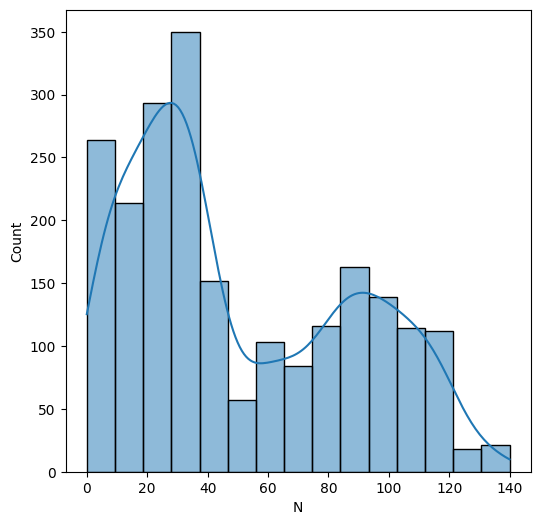

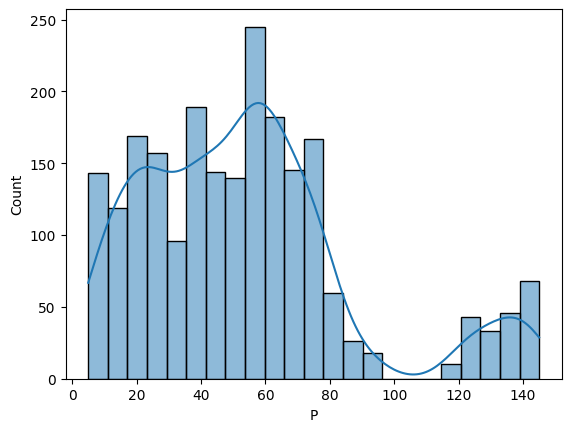

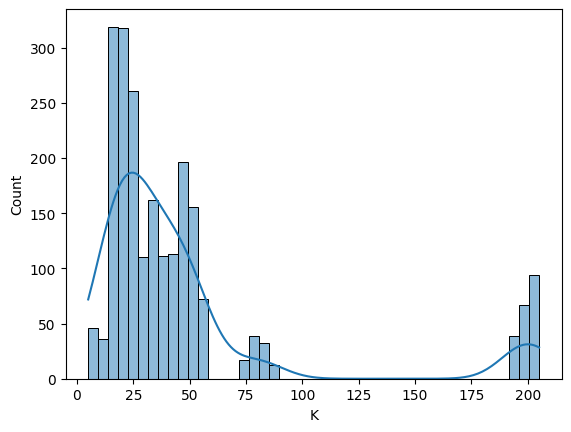

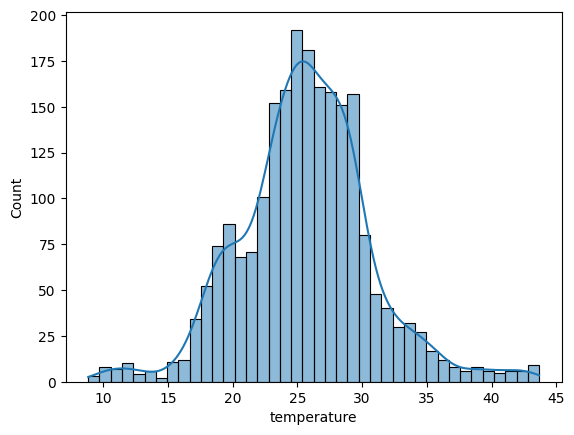

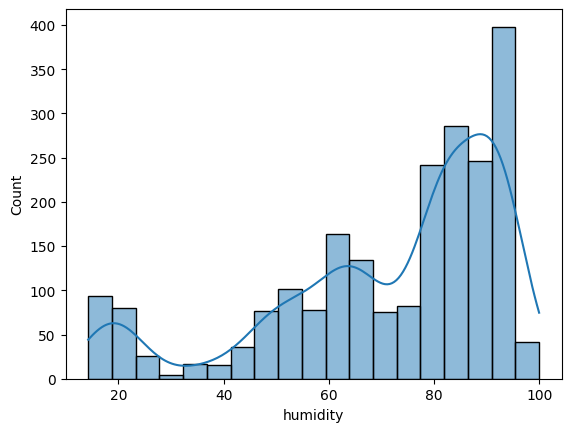

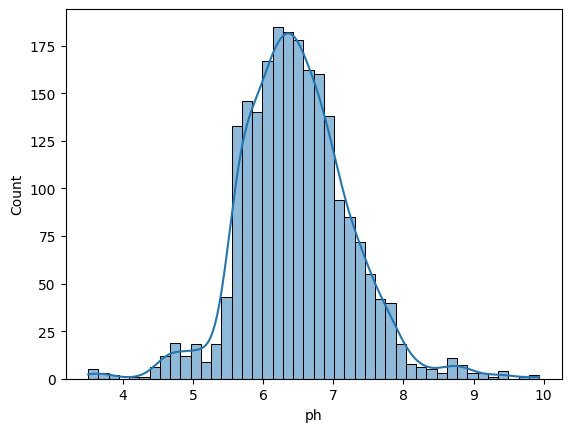

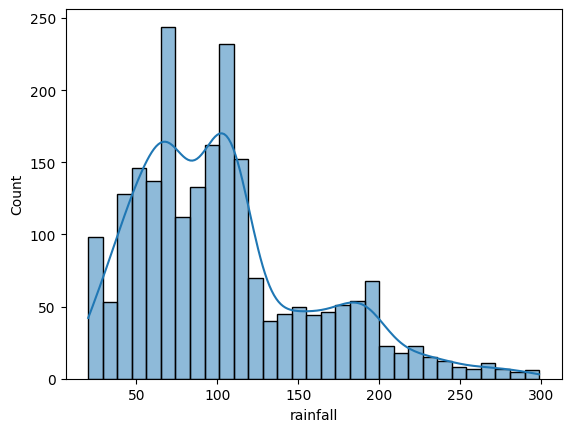

In [13]:
plt.figure(figsize=(6,6))
x=0
for i in numerical_cols :
    sns.histplot(data= df  , x=i , kde =True)
    print('\n')
    plt.show()

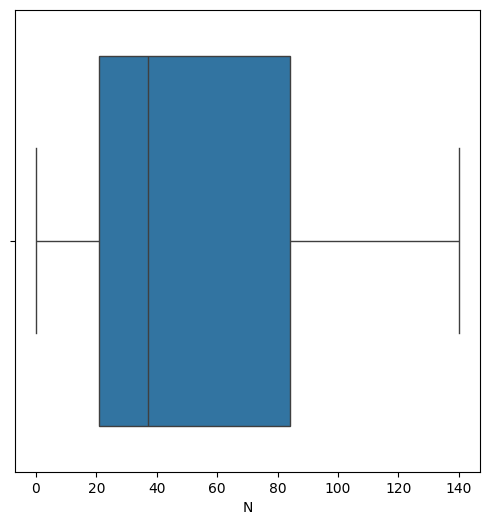

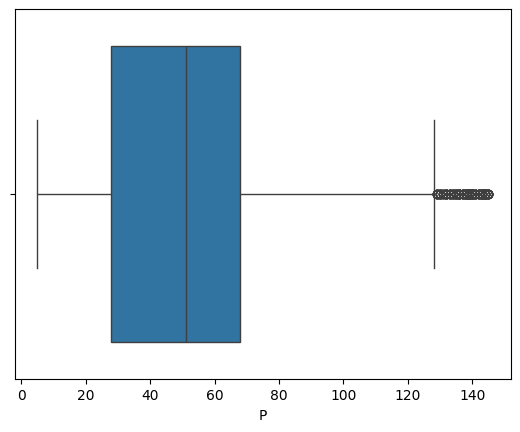

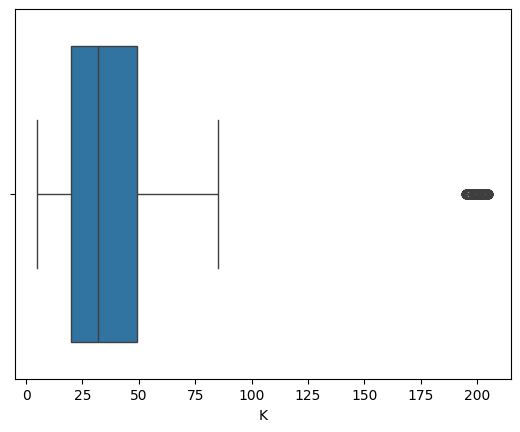

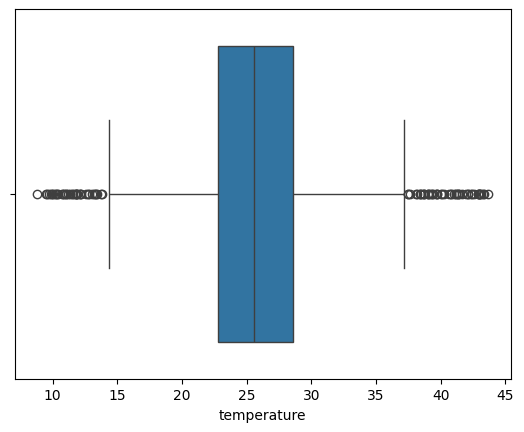

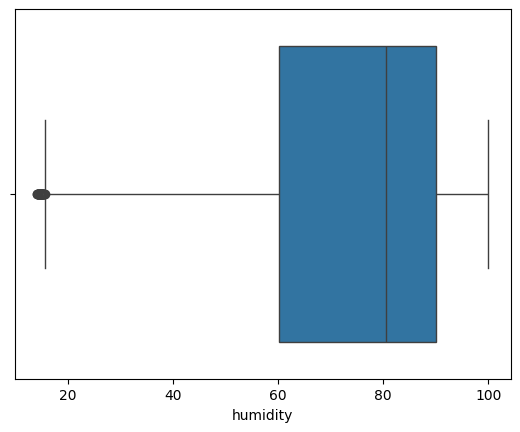

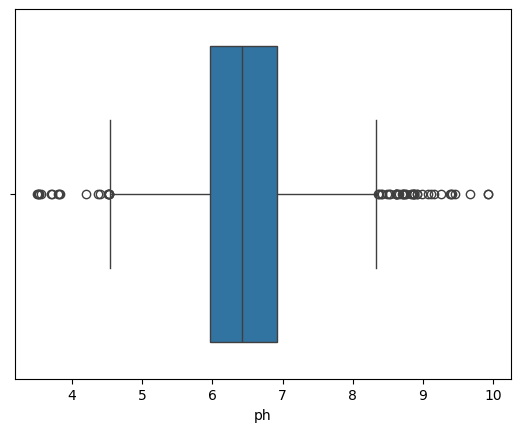

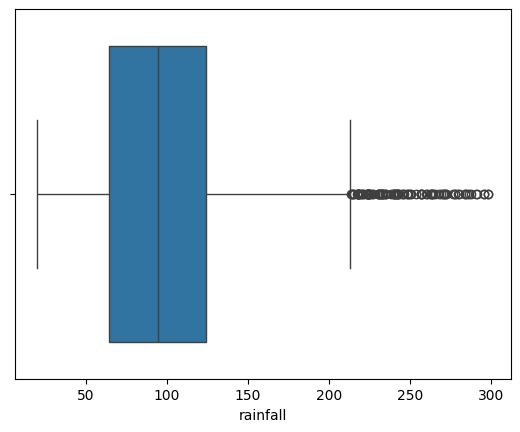

In [14]:
plt.figure(figsize=(6,6))
x=0
for i in numerical_cols :
    sns.boxplot(data= df  , x=i)
    print('\n')
    plt.show()

<Axes: >

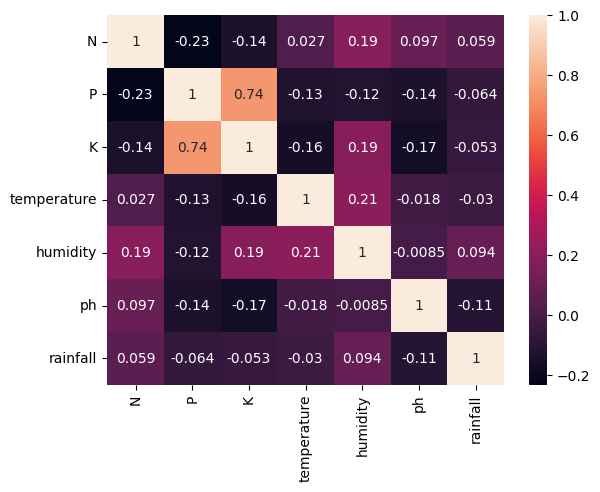

In [15]:
sns.heatmap(df[numerical_cols].corr() , annot=True)

In [16]:
df['N'].unique()

array([ 90,  85,  60,  74,  78,  69,  94,  89,  68,  91,  93,  77,  88,
        76,  67,  83,  98,  66,  97,  84,  73,  92,  95,  99,  63,  62,
        64,  82,  79,  65,  75,  71,  72,  70,  86,  61,  81,  80, 100,
        87,  96,  40,  23,  39,  22,  36,  32,  58,  59,  42,  28,  43,
        27,  50,  25,  31,  26,  54,  57,  49,  46,  38,  35,  52,  44,
        24,  29,  20,  56,  37,  51,  41,  34,  30,  33,  47,  53,  45,
        48,  13,   2,  17,  12,   6,  10,  19,  11,  18,  21,  16,   9,
         1,   7,   8,   0,   3,   4,   5,  14,  15,  55, 105, 108, 118,
       101, 106, 109, 117, 114, 110, 112, 111, 102, 116, 119, 107, 104,
       103, 120, 113, 115, 133, 136, 126, 121, 129, 122, 140, 131, 135,
       123, 125, 139, 132, 127, 130, 134])

In [17]:
df['P'].unique()

array([ 42,  58,  55,  35,  37,  53,  54,  46,  56,  50,  48,  38,  45,
        40,  59,  41,  47,  49,  51,  57,  39,  43,  44,  60,  52,  36,
        72,  67,  73,  70,  62,  74,  66,  63,  71,  78,  80,  68,  65,
        77,  76,  79,  61,  64,  69,  75,  24,  18,  26,  27,  25,  21,
        30,  11,   5,  10,   7,  20,  22,  15,  23,   8,  16,  29,  17,
         6,  19,  13,   9,  14,  28,  94,  95,  92,  89,  88,  87,  85,
        86,  83,  91,  81,  84,  90,  82,  93,  33,  31,  34,  32, 130,
       144, 123, 125, 131, 140, 122, 134, 145, 139, 141, 138, 136, 132,
       133, 121, 126, 120, 142, 135, 129, 128, 137, 127, 124, 143,  12])

In [18]:
df['K'].unique()

array([ 43,  41,  44,  40,  42,  38,  36,  37,  39,  35,  45,  16,  17,
        21,  20,  19,  25,  22,  15,  18,  23,  24,  77,  84,  85,  81,
        75,  79,  76,  83,  78,  80,  82,  46,  50,  53,  54,  49,  55,
        52,  47,  48,  51,  27,  31,  32,  34,  33,  30,  28,  29,  26,
       195, 204, 205, 196, 198, 197, 203, 201, 202, 199, 200,  12,  13,
         6,   9,  10,  14,   8,   7,   5,  11])

In [19]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [20]:
crop_dict = {
    'rice': 0,
    'maize': 1,
    'jute': 2,
    'cotton': 3,
    'coconut': 4,
    'papaya': 5,
    'orange': 6,
    'apple': 7,
    'muskmelon': 8,
    'watermelon': 9,
    'grapes': 10,
    'mango': 11,
    'banana': 12,
    'pomegranate': 13,
    'lentil': 14,
    'blackgram': 15,
    'mungbean': 16,
    'mothbeans': 17,
    'pigeonpeas': 18,
    'kidneybeans': 19,
    'chickpea': 20,
    'coffee': 21
}
df['crop_num']=df['label'].map(crop_dict)

In [21]:
df['crop_num'].value_counts()

crop_num
0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
Name: count, dtype: int64

# **MODEL TRAINING**


In [43]:
# Target variable as y and the feature variables as x
# Dropping the target column label from the Dataset to generate our model
x = df.drop(columns=['label', 'crop_num'])
y = df['crop_num']  # Selecting the target variable label

# Segregating numerical and categorical variables
cat_cols = x.select_dtypes(include='object').columns  # Columns with data type 'object'
numerical_cols = x.select_dtypes(exclude='object').columns  # Columns with non-object data types


In [23]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [24]:
y.shape

(2200,)

In [25]:
# Importing necessary libraries for preprocessing and model building
from sklearn.impute import SimpleImputer  # Used for handling missing values
from sklearn.preprocessing import StandardScaler  # Used for feature scaling
from sklearn.preprocessing import OrdinalEncoder  # Used for encoding ordinal categorical features
from sklearn.pipeline import Pipeline  # Used to streamline a sequence of data processing steps
from sklearn.compose import ColumnTransformer  # Used to apply different preprocessing steps to different columns

In [44]:
num_pipeline = Pipeline(
    steps=
     [
        ('imputer', SimpleImputer(strategy='median')),  # Handling missing values by replacing them with the median value
        ('scaler', StandardScaler())  # Scaling numerical features to have zero mean and unit variance
     ]
)

In [45]:
## Train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [46]:
x_train = pd.DataFrame(num_pipeline.fit_transform(x_train),columns=num_pipeline.get_feature_names_out())
x_test = pd.DataFrame(num_pipeline.transform(x_test),columns=num_pipeline.get_feature_names_out())

In [29]:
x_train.shape

(1760, 7)

In [30]:
x_test.shape

(440, 7)

In [31]:
x_train.head()

,N,P,K,temperature,humidity,ph,rainfall
0,-0.903427,-1.126162,-0.668507,-1.804692,0.936586,0.193474,0.005150
1,-0.367051,0.770359,-0.570590,0.386000,-0.100470,0.863918,-0.605291
2,-1.171614,0.589738,-0.453089,0.381678,-0.382775,1.050298,-1.045807
3,1.349349,0.499427,-0.002670,-0.043047,0.157688,-0.599105,0.252872
4,-1.359346,-1.096058,-0.355172,1.944562,-1.071303,-0.254526,-0.088658


In [47]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Use transform for test data

# Different models for classification
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes (Gaussian)': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Lists to store results
trained_model_list = []
model_list = []
r2_list = []

def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test_encoded, y_pred)
    rmse = mean_squared_error(y_test_encoded, y_pred, squared=False)
    r2_square = r2_score(y_test_encoded, y_pred)
    return mae, rmse, r2_square

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Use ravel() to ensure y_train is 1D

    # Make predictions
    y_pred = model.predict(x_test)

    # Evaluate the model
    mae, rmse, r2_square = evaluate_model(y_test_encoded, y_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model Training Performance')
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 score", r2_square * 100)
    print('\n')
    sum = 100*accuracy_score(y_test,y_pred)
    print("Accuracy Score:",sum)

    r2_list.append(r2_square)

    print('-' * 60 )
    print('\n')

Logistic Regression
Model Training Performance
RMSE: 1.0112997936948631
MAE: 0.11818181818181818
R2 score 97.56041665126526


Accuracy Score: 96.36363636363636
------------------------------------------------------------


Naive Bayes (Gaussian)
Model Training Performance
RMSE: 0.13483997249264842
MAE: 0.00909090909090909
R2 score 99.95662962935583


Accuracy Score: 99.54545454545455
------------------------------------------------------------


Support Vector Machine
Model Training Performance
RMSE: 0.9700046860242949
MAE: 0.1
R2 score 97.75558331916405


Accuracy Score: 96.81818181818181
------------------------------------------------------------


K-Nearest Neighbors
Model Training Performance
RMSE: 0.6758832604956139
MAE: 0.1159090909090909
R2 score 98.91031943756515


Accuracy Score: 95.9090909090909
------------------------------------------------------------


Decision Tree
Model Training Performance
RMSE: 0.27797972457128467
MAE: 0.031818181818181815
R2 score 99.81567592476226

In [49]:
# Saving the trained model to a file
import pickle  # Used for serializing and deserializing Python objects

# Training the Naive Bayes model as it's accuracy is 100%
model = GaussianNB()
model.fit(x_train, y_train_encoded)  # Fitting the NB model on the training data

# Saving the model to a pickle file
pickle_filename = 'model.pkl'
with open(pickle_filename, 'wb') as file:  # Opening the file in write-binary mode
    pickle.dump(model, file)  # Dumping the trained model into the file

print(f'Model saved to {pickle_filename}')  # Message to indicate the model has been saved

Model saved to model.pkl


# Loading trained model from .pkl file

In [50]:
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

# Assuming df is your DataFrame containing the data
x = df.drop(columns=['label', 'crop_num'])

# Recreate and fit the scaler with the training data
scaler = StandardScaler()
scaler.fit(x)  # Fit the scaler with the training data

# Scale the test data using the scaler
X_test_scaled = scaler.transform(x)

# Convert the scaled data back to a DataFrame with column names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=x.columns)

# Make predictions on the scaled test data
y_pred_encoded = model.predict(X_test_scaled_df)

# Define crop_dict with numerical labels as keys and crop names as values
crop_dict = {0: 'rice', 1: 'maize', 2: 'jute', 3: 'cotton', 4: 'coconut', 5: 'papaya', 6: 'orange', 7: 'apple', 8: 'muskmelon', 9: 'watermelon', 10: 'grapes', 11: 'mango', 12: 'banana', 13: 'pomegranate', 14: 'lentil', 15: 'blackgram', 16: 'mungbean', 17: 'mothbeans', 18: 'pigeonpeas', 19: 'kidneybeans', 20: 'chickpea', 21: 'coffee'}

# Map numerical labels to crop names
crop_names = list(crop_dict.values())  # Convert dict_values to a list of crop names
y_pred_mapped = [crop_names[int(label)] for label in y_pred_encoded]

# Show the predicted crop labels
print("Predicted Crop Labels:")
print(y_pred_mapped)


Predicted Crop Labels:
['rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'jute', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'jute', 'rice', 'rice', 'jute', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'jute', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'jute', 'rice', 'rice', 'jute', 'rice', 'rice', 'rice', 'jute', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'jute', 'rice', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maiz

In [51]:
data = GaussianNB()
data.fit(x_train,y_train)
ypred = data.predict(x_test)
accuracy_score(y_test,ypred)

0.9954545454545455

In [52]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

#  **PREDICTIVE SYSTEM**

In [54]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = scaler.fit_transform(transformed_features)
    prediction = model.predict(features).reshape(1,-1)

    return prediction[0]

In [55]:
N = float(input("Amount of Sodium:"))
P = float(input("Amount of Phosphorus:"))
K = float(input("Amount of Potassium:"))
temperature = float(input("Temperature (in Celsius):"))
humidity = float(input("Humidity (in percentage):"))
ph = float(input("pH value:"))
rainfall = float(input("Rainfall (in mm):"))

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)
import warnings
warnings.filterwarnings("ignore", category = UserWarning)
crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Amount of Sodium:40
Amount of Phosphorus:50
Amount of Potassium:50
Temperature (in Celsius):40
Humidity (in percentage):20
pH value:5
Rainfall (in mm):200
Coconut is a best crop to be cultivated 
